In [1]:
# train_and_save_linear_regression.py

import pandas as pd
from sklearn.model_selection import train_test_split
from data_preparation import load_and_preprocess_data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import pickle
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load and preprocess data
df = load_and_preprocess_data()

# Prepare features and target
X = df.drop(columns=[
    "cumulative_milliseconds", "positionOrder", "date", "driverRef", "number", 
    "date_race", "time_race", "time", "forename", "surname", "dob", "url_race", 
    "location", "circuitRef", "milliseconds"
])
y = df["milliseconds"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define categorical and numerical features
categorical_features = ["code", "nationality", "status", "circuit_type", "country"]
numerical_features = X.columns.drop(categorical_features)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=100)),  # Adjust n_components as needed
    ('regressor', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
model_path = "models/linear_regression_pipeline.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(pipeline, f)

print(f"Linear Regression pipeline saved to {model_path}")


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:25: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  practice_sessions = pd.read_csv('../data/raw_data/ff1_laps.csv', na_values=na_values)
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:26: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  tire_data = pd.read_csv('../data/raw_data/ff1_laps.csv', na_values=na_values)


(586171, 15)
(586171, 32)
(586171, 40)
(586171, 45)
(586171, 46)
(586171, 47)
(586171, 47)


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['pitstop_milliseconds'].fillna(0, inplace=True)  # Assuming 0 if no pit stop
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:108: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

(159538, 56)


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:226: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['Compound'].fillna('UNKNOWN', inplace=True)
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:282: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

Shape of laps before merging weather data: (159538, 65)

Processing race 989 (2018 AUSTRALIAN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 990 (2018 BAHRAIN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 991 (2018 CHINESE GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 992 (2018 AZERBAIJAN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 993 (2018 SPANISH GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 994 (2018 MONACO GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 995 (2018 CANADIAN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 996 (2018 FRENCH GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 997 (2018 AUSTRIAN

/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:385: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps_with_weather['TrackTemp'].fillna(25.0, inplace=True)
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:386: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

Final weather columns added and cleaned:
   raceId  lap  TrackTemp  AirTemp  Humidity
0     989    1       25.0     20.0      50.0
1     989    2       25.0     20.0      50.0
2     989    3       25.0     20.0      50.0
3     989    4       25.0     20.0      50.0
4     989    5       25.0     20.0      50.0
Shape of laps after merging weather data: (159538, 64)
No duplicate rows found after merging weather data.


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:657: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['TrackStatus'].fillna(1, inplace=True)  # 1 = regular racing status


Shape before filtering and outlier removal: (159538, 73)
Normal racing laps: (138943, 73)
Special laps (pit stops, safety car, etc.): (20595, 73)
Final shape after outlier removal: (149873, 73)
Linear Regression pipeline saved to models/linear_regression_pipeline.pkl


2024-12-01 12:34:53,447 - INFO - Initialized 19 drivers for raceId 1000


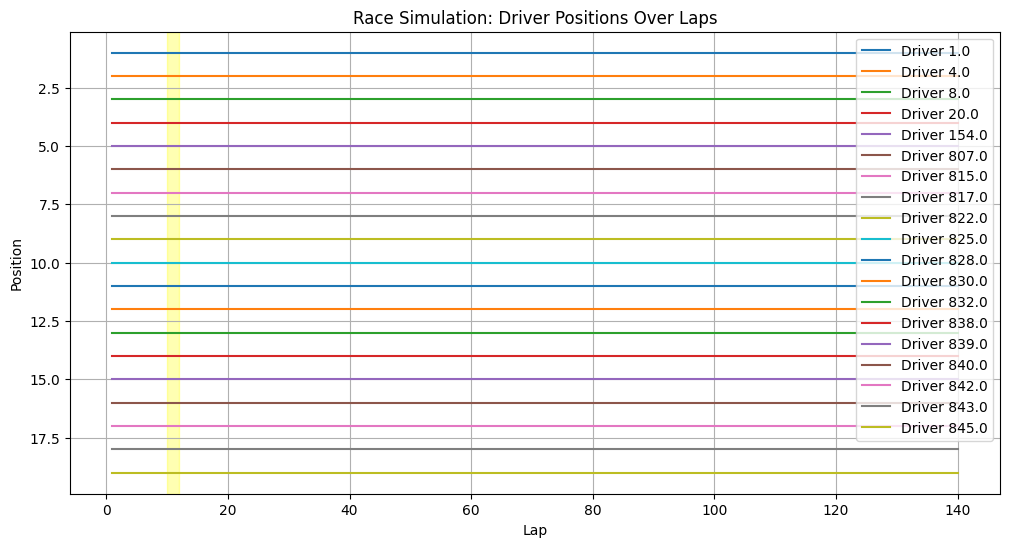

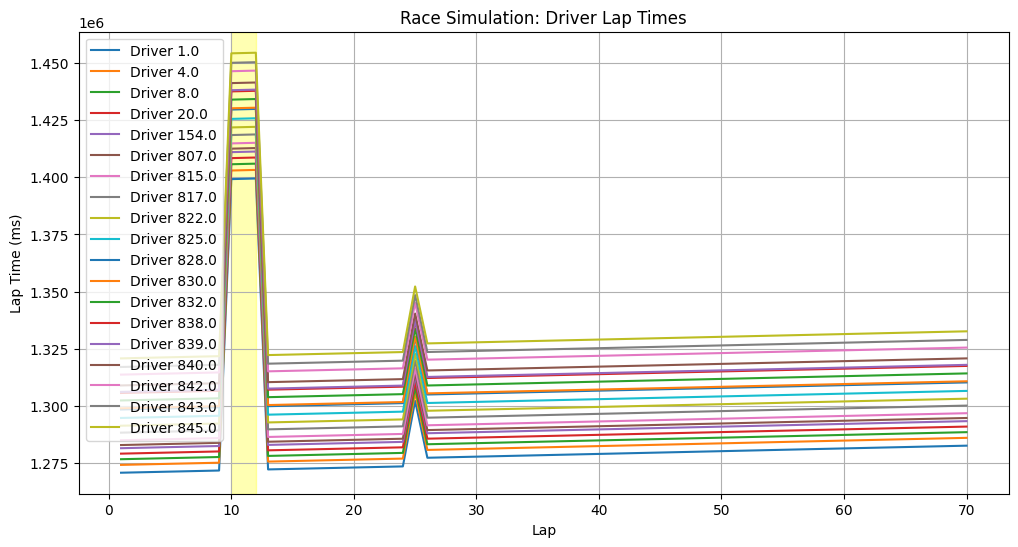

In [2]:
# simulation_linear_regression.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from race_simulator_linear_regression import (
    Race, Driver, RaceSimulator, plot_race_positions, plot_lap_times
)
import pickle

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the trained pipeline
model_path = 'models/linear_regression_pipeline.pkl'
with open(model_path, 'rb') as f:
    pipeline = pickle.load(f)

# Function to get race length (you can adjust this based on your data)
def get_race_length(race_id: int, lap_times_df: pd.DataFrame) -> int:
    """
    Get the actual race length for a given race ID from historical data.
    """
    race_laps = lap_times_df[lap_times_df['raceId'] == race_id]['lap'].max()
    if pd.isna(race_laps):
        # Fallback to a default length if race not found
        return 50
    return int(race_laps)

# Load necessary data
lap_times = pd.read_csv('data/LAPS.csv', na_values=['\\N', 'NaN', ''])
race_length = get_race_length(1000, lap_times)  # Use your actual race ID

# Create an instance of the Race with actual length
race = Race(
    race_id=1000,
    circuit_id=1,
    total_laps=race_length,
    weather_conditions={},  # Add actual weather data if available
    safety_car_periods=[(10, 12)]  # Example safety car periods
)

# Load driver attributes    
drivers_df = pd.read_csv('data/util/drivers_attributes.csv')

# Define categorical and numerical features (must match training)
categorical_features = ["code", "nationality", "status", "circuit_type", "country"]
numerical_features = list(set(pipeline.named_steps['preprocessor'].transformers_[0][2]))

def initialize_drivers(drivers_df, pipeline, race):
    drivers = []

    # Filter driver attributes for the specific raceId
    drivers_df = drivers_df[drivers_df['raceId'] == race.race_id]

    if drivers_df.empty:
        raise ValueError(f"No drivers found for raceId {race.race_id}")

    for idx, row in drivers_df.iterrows():
        # Load driver features from LAPS.csv
        driver_features_df = pd.read_csv('data/LAPS.csv')  # Adjust path as needed
        driver_features = driver_features_df[driver_features_df['driverId'] == row['driverId']]

        if driver_features.empty:
            raise ValueError(f"No feature data found for driverId {row['driverId']}")

        driver_features = driver_features.iloc[0]

        # Update dynamic features based on simulation requirements
        dynamic_features = {
            'tire_age': 0,
            'fuel_load': 100.0,
            'track_position': idx + 1,
            'TrackTemp': 35.0,
            'AirTemp': 25.0,
            'Humidity': 50.0,
            'TrackStatus': 1,
            'is_pit_lap': 0,
            'tire_compound': 2  # Starting tire compound
        }

        # Combine static and dynamic features
        full_features = driver_features.to_dict()
        full_features.update(dynamic_features)

        # Create a DataFrame for the driver
        driver_df = pd.DataFrame([full_features])

        # Ensure all necessary columns are present
        for col in numerical_features + categorical_features:
            if col not in driver_df.columns:
                driver_df[col] = 0  # Add missing numerical features with zeros

        # Extract features needed for the pipeline
        driver_df = driver_df[numerical_features + categorical_features]

        # Transform features using the pipeline (excluding the regression model)
        transformed_features = pipeline.named_steps['preprocessor'].transform(driver_df)
        scaled_features = pipeline.named_steps['pca'].transform(transformed_features)

        # Create the Driver instance
        driver = Driver(
            driver_id=row['driverId'],
            name=f"Driver {row['driverId']}",
            static_features=scaled_features.flatten(),  # Using PCA-transformed features
            initial_dynamic_features=dynamic_features,
            start_position=idx + 1,
            pit_strategy=[(25, 3)],  # Example pit strategy to switch to soft tires
            starting_compound=2
        )

        # Initialize sequence as None since we're using Linear Regression
        driver.sequence = None

        drivers.append(driver)

    logging.info(f"Initialized {len(drivers)} drivers for raceId {race.race_id}")
    return drivers

# Initialize drivers using the pipeline
drivers = initialize_drivers(drivers_df, pipeline, race)

# Add drivers to the race
race.drivers.extend(drivers)

# Initialize the RaceSimulator for Linear Regression
simulator = RaceSimulator(pipeline, model_type='linear_regression')

# Simulate the race
race_lap_data = simulator.simulate_race(race)

# Proceed with analysis and plotting
plot_race_positions(race)
plot_lap_times(race)
